# How Much Calories Burnt Prediction Doing Some Exercises

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load my data and check 

In [2]:
df1 = pd.read_csv("calories.csv")

In [3]:
df2 = pd.read_csv("exercise.csv")

In [ ]:
# We Have two diff diff dataset 'df1' & 'df2' so i concate to this dataset in a one dataset 'df'

In [4]:
df1

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [5]:
df2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [6]:
df=pd.concat([df2,df1["Calories"]],axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
# WE Check their Head(first 5 Rows) & their Shape(how many rows and columns)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.shape

(15000, 9)

looking missing values

# checking Null values 

In [9]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
# so,my dataset have no any null value

# Get Some Statistical Measure about the data

In [10]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

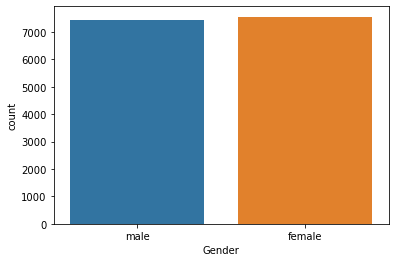

In [11]:
# Plotting Gender column in Count plot
# in that features we check count of my two varients in my'Gender' column (check both class count/frquency/distribution)
sns.countplot(x='Gender',data=df)

C:\Users\HP-8440P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

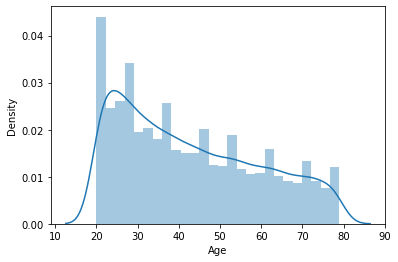

In [12]:
# Finding The Distributuion of Age column
sns.distplot(df['Age'])

C:\Users\HP-8440P\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

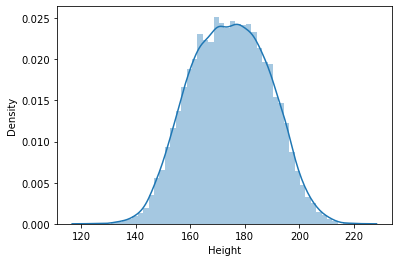

In [13]:
# Finding The Distribution of Height Column
sns.distplot(df['Height'])

# We Check "Correlations" my features-fetures and features-target

In [14]:
corr_matrix = df.corr()
corr_matrix

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


## We Make Heatplot of My correlations

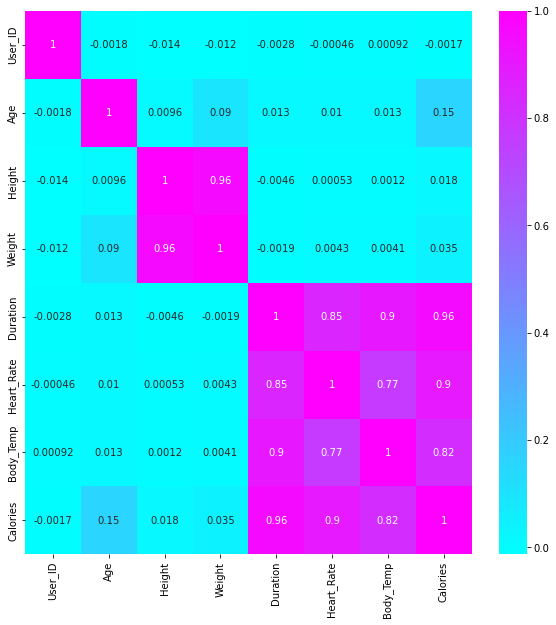

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='cool')
plt.show()

# Encode the My 'Gender' Column

In [16]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


## We Drop Unwanted Column
## Devide My dataset In part X and Y

In [17]:
x = df.drop(columns=['Calories','User_ID'],axis=1)
y = df['Calories']

In [18]:
y.shape,x.shape

((15000,), (15000, 7))

# Splitting dataset into Train and Test

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Training and Testing My Model 

## 1. we Train model Using LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_reg = LinearRegression(n_jobs=-1)

In [23]:
linear_reg.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [24]:
linear_reg.coef_

array([  1.4198873 ,   0.4971492 ,  -0.19413313,   0.31333848,
         6.64043789,   1.98718175, -17.09094547])

In [25]:
linear_reg.intercept_

469.08951109326483

In [26]:
prediction = linear_reg.predict(x_test)

In [27]:
MAE2 = mean_absolute_error(y_test,prediction)

In [28]:
print('mean absolute error of linear regression is----->',MAE2)

mean absolute error of linear regression is-----> 8.385188053147177


## 2. We Train Model Using XGboost Regressor

------------------Why Use XGBoost regresser-----------------

XGBoost (Extreme Gradient Boosting) is a popular and powerful machine learning algorithm used for both regression and classification tasks. It has gained significant popularity and is widely used for various reasons:

1. **High performance**: XGBoost is designed to be highly efficient and scalable. It uses parallel processing, tree pruning, and other optimization techniques to achieve high performance even on large datasets.

2. **Regularization**: XGBoost has built-in regularization techniques like L1 and L2 regularization, which help prevent overfitting and improve the model's generalization ability.

3. **Handling missing data**: XGBoost can automatically handle missing values in the dataset, reducing the need for imputation techniques.

4. **Feature importance**: XGBoost provides a way to rank the importance of features, which helps in feature selection and understanding the model's decision-making process.

5. **Flexibility**: It can handle various types of data, including numeric and categorical features. It can also be used for both regression and classification problems.

6. **Ensemble method**: XGBoost is an ensemble learning method based on the boosting technique. It combines the predictions of multiple weak learners (decision trees) to create a strong learner, leading to better predictive performance.

7. **Tree pruning**: XGBoost uses a depth-first approach for growing trees and applies pruning to control tree complexity, reducing the risk of overfitting.

8. **Handling skewed classes**: XGBoost provides options to deal with class imbalances, which is a common issue in classification tasks.

9. **Wide range of applications**: XGBoost has been successfully applied in various domains, including finance, healthcare, natural language processing, and computer vision, among others.

10. **Open-source and community support**: XGBoost is an open-source library with active development and a large community. This ensures continuous improvement and availability of resources for users.

Due to its versatility and outstanding performance, XGBoost has become a go-to choice for many machine learning practitioners and data scientists when dealing with structured data. However, as with any machine learning algorithm, it's essential to understand your data and problem domain before selecting the best algorithm for your specific use case.

In [29]:
model = XGBRegressor()

In [30]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
model_prediction = model.predict(x_test)
print(model_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [32]:
MAE = mean_absolute_error(y_test,model_prediction)

In [33]:
print('Mean Absolute Error-------->', MAE)

Mean Absolute Error--------> 1.4807048829992613


### After Seeing Both Model Performance XGboost Model are work Better Than Linear Regression